In [191]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import statsmodels.api as sm
import seaborn as sns

X = pd.read_csv('/Users/kyliehoar/Downloads/CS4342/Assignment 3/Weakly.csv')

def dir_change(x):
    if x == 'Down':
        x = 0
        return x
    if x == 'Up':
        x = 1
        return x
        
new_dir_col = X["Direction"].apply(dir_change)
X["Direction"] = new_dir_col

print(X)

      Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1
...    ...    ...    ...    ...    ...    ...       ...    ...        ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969          1
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281          1
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283          1
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034          1
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069          1

[1089 rows x 9 columns]


              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today    Direction  
count  1089.000000  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899     0.555556  
std       2.361285     1.686636     2.356927     0.497132  
min     -18.195000     0.087465   -18.195000     0.000000  
25%      -1.166000     0.332022  

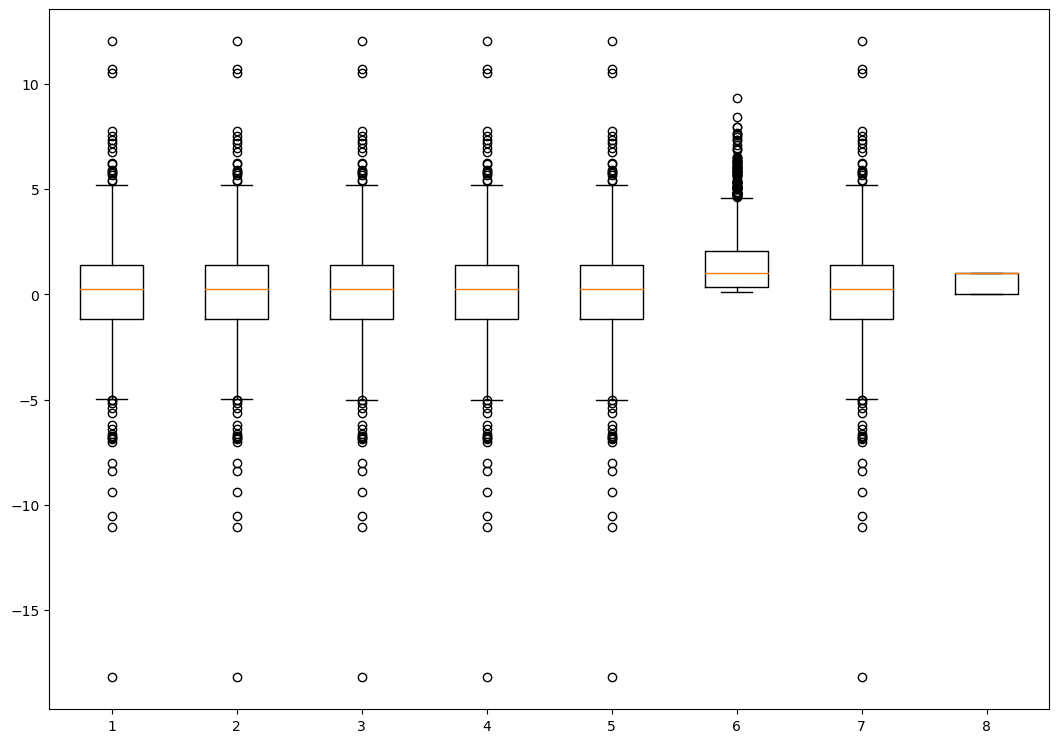

In [257]:
#PROBLEM 1 PART A

print(X.describe())

lag1 = X["Lag1"]
lag2 = X["Lag2"]
lag3 = X["Lag3"]
lag4 = X["Lag4"]
lag5 = X["Lag5"]
vol = X["Volume"]
today = X["Today"]
dire = X["Direction"]
data = [lag1, lag2, lag3, lag4, lag5, vol, today, dire]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()

In [135]:
#PROBLEM 1 PARTS B and C

#scikitlearn
x = X[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = X['Direction'].values.reshape(-1,1)
model = LogisticRegression(solver='liblinear', random_state=0)
results = model.fit(x, y)

#statsmodels
model1 = sm.Logit(y, x)
result = model1.fit()
print(result.summary())

# confusion matrix
matrix = metrics.confusion_matrix(model.predict(x), y)
matrix

Optimization terminated successfully.
         Current function value: 0.686896
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:               9.505e-05
Time:                        08:16:22   Log-Likelihood:                -748.03
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9996
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0327      0.026     -1.250      0.211      -0.084       0.019
Lag2           0.0682      0.

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 55,  47],
       [429, 558]])

In [183]:
#PROBLEM 1 PART D

train = X.loc[X['Year'].isin(range(1990, 2009))]
test = X.loc[X['Year'].isin([2009, 2010])]

lag2_train = train["Lag2"].values.reshape(-1, 1)
lag2_test = test["Lag2"].values.reshape(-1, 1)
dir_train = train["Direction"]
dir_test = test["Direction"]

#scikitlearn
model = LogisticRegression(solver='liblinear', random_state=0)
results = model.fit(lag2_train, dir_train)

#statsmodels
model1 = sm.Logit(dir_train, lag2_train)
result = model1.fit()
print(result.summary())

# confusion matrix
matrix = metrics.confusion_matrix(model.predict(lag2_test), dir_test)
print(matrix)

#accuracy score
accuracy = metrics.accuracy_score(model.predict(lag2_test), dir_test)
print(accuracy)

Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:               -0.004340
Time:                        10:08:00   Log-Likelihood:                -680.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0629      0.029      2.192      0.028       0.007       0.119
[[ 9  5]
 [34 56]]
0.625


In [258]:
#PROBLEM 1 PART E

#LDA
model = LinearDiscriminantAnalysis()
results = model.fit(lag2_train, dir_train)

# confusion matrix
matrix = metrics.confusion_matrix(model.predict(lag2_test), dir_test)
print(matrix)

#accuracy score
accuracy = metrics.accuracy_score(model.predict(lag2_test), dir_test)
print(accuracy)

[[ 9  5]
 [34 56]]
0.625


In [186]:
#PROBLEM 1 PART F

#QDA
model = QuadraticDiscriminantAnalysis()
results = model.fit(lag2_train, dir_train)

# confusion matrix
matrix = metrics.confusion_matrix(model.predict(lag2_test), dir_test)
print(matrix)

#accuracy score
accuracy = metrics.accuracy_score(model.predict(lag2_test), dir_test)
print(accuracy)

[[ 0  0]
 [43 61]]
0.5865384615384616


In [187]:
#PROBLEM 1 PART G

#KNN, K=1
model = KNeighborsClassifier(n_neighbors=1)
results = model.fit(lag2_train, dir_train)

# confusion matrix
matrix = metrics.confusion_matrix(model.predict(lag2_test), dir_test)
print(matrix)

#accuracy score
accuracy = metrics.accuracy_score(model.predict(lag2_test), dir_test)
print(accuracy)

[[21 30]
 [22 31]]
0.5


In [216]:
#PROBLEM 1 PART I

#LogReg
def logreg(x, y, x_test, y_test):
    model = LogisticRegression(solver='liblinear', random_state=0)
    results = model.fit(x, y)
    
    matrix = metrics.confusion_matrix(model.predict(x_test), y_test)
    print(matrix)
    
    accuracy = metrics.accuracy_score(model.predict(x_test), y_test)
    print(accuracy)

#LDA
def lda(x, y, x_test, y_test):
    model = LinearDiscriminantAnalysis()
    results = model.fit(x, y)
    
    matrix = metrics.confusion_matrix(model.predict(x_test), y_test)
    print(matrix)
    
    accuracy = metrics.accuracy_score(model.predict(x_test), y_test)
    print(accuracy)

#QDA
def qda(x, y, x_test, y_test):
    model = QuadraticDiscriminantAnalysis()
    results = model.fit(x, y)
    
    matrix = metrics.confusion_matrix(model.predict(x_test), y_test)
    print(matrix)
    
    accuracy = metrics.accuracy_score(model.predict(x_test), y_test)
    print(accuracy)

#KNN
def knn(x, y, x_test, y_test, n):
    model = KNeighborsClassifier(n_neighbors=n)
    results = model.fit(x, y)
    
    matrix = metrics.confusion_matrix(model.predict(x_test), y_test)
    print(matrix)
    
    accuracy = metrics.accuracy_score(model.predict(x_test), y_test)
    print(accuracy)
    
#Test combinations
train = X.loc[X['Year'].isin(range(1990, 2009))]
x_train = train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']]
y_train = train['Direction']
test = X.loc[X['Year'].isin([2009, 2010])]
x_test = test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']]
y_test = test['Direction']

print("logreg")
logreg(x_train, y_train, x_test, y_test)
logreg(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_test)
logreg(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test)
logreg(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test)
logreg(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_test)
logreg(x_train[['Lag1', 'Lag2', 'Lag3']], y_train, x_test[['Lag1', 'Lag2', 'Lag3']], y_test)
logreg(x_train[['Lag2', 'Volume', 'Today']], y_train, x_test[['Lag2', 'Volume', 'Today']], y_test)
logreg(x_train[['Lag1', 'Lag2', 'Volume', 'Today']], y_train, x_test[['Lag1', 'Lag2', 'Volume', 'Today']], y_test)
logreg(x_train[['Lag1', 'Lag2', 'Volume']], y_train, x_test[['Lag1', 'Lag2', 'Volume']], y_test)
logreg(x_train[['Lag1', 'Lag3', 'Volume']], y_train, x_test[['Lag1', 'Lag3', 'Volume']], y_test)

print('\n')
print("lda")
lda(x_train, y_train, x_test, y_test)
lda(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_test)
lda(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test)
lda(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test)
lda(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_test)
lda(x_train[['Lag1', 'Lag2', 'Lag3']], y_train, x_test[['Lag1', 'Lag2', 'Lag3']], y_test)
lda(x_train[['Lag2', 'Volume', 'Today']], y_train, x_test[['Lag2', 'Volume', 'Today']], y_test)
lda(x_train[['Lag1', 'Lag2', 'Volume', 'Today']], y_train, x_test[['Lag1', 'Lag2', 'Volume', 'Today']], y_test)
lda(x_train[['Lag1', 'Lag2', 'Volume']], y_train, x_test[['Lag1', 'Lag2', 'Volume']], y_test)
lda(x_train[['Lag1', 'Lag3', 'Volume']], y_train, x_test[['Lag1', 'Lag3', 'Volume']], y_test)

print('\n')
print("qda")
qda(x_train, y_train, x_test, y_test)
qda(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_test)
qda(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test)
qda(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test)
qda(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_test)
qda(x_train[['Lag1', 'Lag2', 'Lag3']], y_train, x_test[['Lag1', 'Lag2', 'Lag3']], y_test)
qda(x_train[['Lag2', 'Volume', 'Today']], y_train, x_test[['Lag2', 'Volume', 'Today']], y_test)
qda(x_train[['Lag1', 'Lag2', 'Volume', 'Today']], y_train, x_test[['Lag1', 'Lag2', 'Volume', 'Today']], y_test)
qda(x_train[['Lag1', 'Lag2', 'Volume']], y_train, x_test[['Lag1', 'Lag2', 'Volume']], y_test)
qda(x_train[['Lag1', 'Lag3', 'Volume']], y_train, x_test[['Lag1', 'Lag3', 'Volume']], y_test)

print('\n')
print("knn, k=1")
knn(x_train, y_train, x_test, y_test, 1)
knn(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_test, 1)
knn(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test, 1)
knn(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test, 1)
knn(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_test, 1)
knn(x_train[['Lag1', 'Lag2', 'Lag3']], y_train, x_test[['Lag1', 'Lag2', 'Lag3']], y_test, 1)
knn(x_train[['Lag2', 'Volume', 'Today']], y_train, x_test[['Lag2', 'Volume', 'Today']], y_test, 1)
knn(x_train[['Lag1', 'Lag2', 'Volume', 'Today']], y_train, x_test[['Lag1', 'Lag2', 'Volume', 'Today']], y_test, 1)
knn(x_train[['Lag1', 'Lag2', 'Volume']], y_train, x_test[['Lag1', 'Lag2', 'Volume']], y_test, 1)
knn(x_train[['Lag1', 'Lag3', 'Volume']], y_train, x_test[['Lag1', 'Lag3', 'Volume']], y_test, 1)

print('\n')
print("knn, k=10")
knn(x_train, y_train, x_test, y_test, 10)
knn(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_test, 10)
knn(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test, 10)
knn(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test, 10)
knn(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_test, 10)
knn(x_train[['Lag1', 'Lag2', 'Lag3']], y_train, x_test[['Lag1', 'Lag2', 'Lag3']], y_test, 10)
knn(x_train[['Lag2', 'Volume', 'Today']], y_train, x_test[['Lag2', 'Volume', 'Today']], y_test, 10)
knn(x_train[['Lag1', 'Lag2', 'Volume', 'Today']], y_train, x_test[['Lag1', 'Lag2', 'Volume', 'Today']], y_test, 10)
knn(x_train[['Lag1', 'Lag2', 'Volume']], y_train, x_test[['Lag1', 'Lag2', 'Volume']], y_test, 10)
knn(x_train[['Lag1', 'Lag3', 'Volume']], y_train, x_test[['Lag1', 'Lag3', 'Volume']], y_test, 10)

print('\n')
print("knn, k=100")
knn(x_train, y_train, x_test, y_test, 100)
knn(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], y_test, 100)
knn(x_train[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test, 100)
knn(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']], y_test, 100)
knn(x_train[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_train, x_test[['Lag1', 'Lag2', 'Lag3', 'Lag4']], y_test, 100)
knn(x_train[['Lag1', 'Lag2', 'Lag3']], y_train, x_test[['Lag1', 'Lag2', 'Lag3']], y_test, 100)
knn(x_train[['Lag2', 'Volume', 'Today']], y_train, x_test[['Lag2', 'Volume', 'Today']], y_test, 100)
knn(x_train[['Lag1', 'Lag2', 'Volume', 'Today']], y_train, x_test[['Lag1', 'Lag2', 'Volume', 'Today']], y_test, 100)
knn(x_train[['Lag1', 'Lag2', 'Volume']], y_train, x_test[['Lag1', 'Lag2', 'Volume']], y_test, 100)
knn(x_train[['Lag1', 'Lag3', 'Volume']], y_train, x_test[['Lag1', 'Lag3', 'Volume']], y_test, 100)

logreg
[[43  0]
 [ 0 61]]
1.0
[[31 44]
 [12 17]]
0.46153846153846156
[[10 14]
 [33 47]]
0.5480769230769231
[[10 14]
 [33 47]]
0.5480769230769231
[[ 8  9]
 [35 52]]
0.5769230769230769
[[ 8  9]
 [35 52]]
0.5769230769230769
[[43  0]
 [ 0 61]]
1.0
[[43  0]
 [ 0 61]]
1.0
[[27 33]
 [16 28]]
0.5288461538461539
[[30 44]
 [13 17]]
0.4519230769230769


lda
[[36  0]
 [ 7 61]]
0.9326923076923077
[[30 44]
 [13 17]]
0.4519230769230769
[[21 30]
 [22 31]]
0.5
[[ 9 13]
 [34 48]]
0.5480769230769231
[[ 7  8]
 [36 53]]
0.5769230769230769
[[ 8  9]
 [35 52]]
0.5769230769230769
[[37  0]
 [ 6 61]]
0.9423076923076923
[[37  0]
 [ 6 61]]
0.9423076923076923
[[27 33]
 [16 28]]
0.5288461538461539
[[32 47]
 [11 14]]
0.4423076923076923


qda
[[43 12]
 [ 0 49]]
0.8846153846153846
[[38 50]
 [ 5 11]]
0.47115384615384615
[[20 25]
 [23 36]]
0.5384615384615384
[[10 23]
 [33 38]]
0.46153846153846156
[[ 9 16]
 [34 45]]
0.5192307692307693
[[ 6 10]
 [37 51]]
0.5480769230769231
[[42  1]
 [ 1 60]]
0.9807692307692307
[[43  5]
 [ 

In [164]:
#Load Auto dataset
Y = pd.read_csv('/Users/kyliehoar/Downloads/CS4342/Assignment 3/Auto.csv')

#Replace N/A values in horsepower w/ mean
Y['horsepower'] = Y['horsepower'].replace('?', pd.NA)
Y['horsepower'] = pd.to_numeric(Y['horsepower'], errors='coerce')
avg_hp = Y['horsepower'].mean(skipna=True)
Y['horsepower'].fillna(avg_hp, inplace=True)

In [192]:
#PROBLEM 2 PART A

Y['mpg01'] = Y['mpg']

def mpg01_make(x):
    if x > Y['mpg'].median():
        x = 1
        return x
    if x <= Y['mpg'].median():
        x = 0
        return x
        
mpg01_col = Y['mpg01'].apply(mpg01_make)
Y["mpg01"] = mpg01_col

MPG: 0.8382387875142135
Cylinders: -0.7403272284989632
Displacement: -0.7386069566138781
Horsepower: -0.6449380064981023
Weight: -0.7457340157224253
Acceleration: 0.32262944968366203
Year 0.4541079231643086
Origin 0.5113933843576399


/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


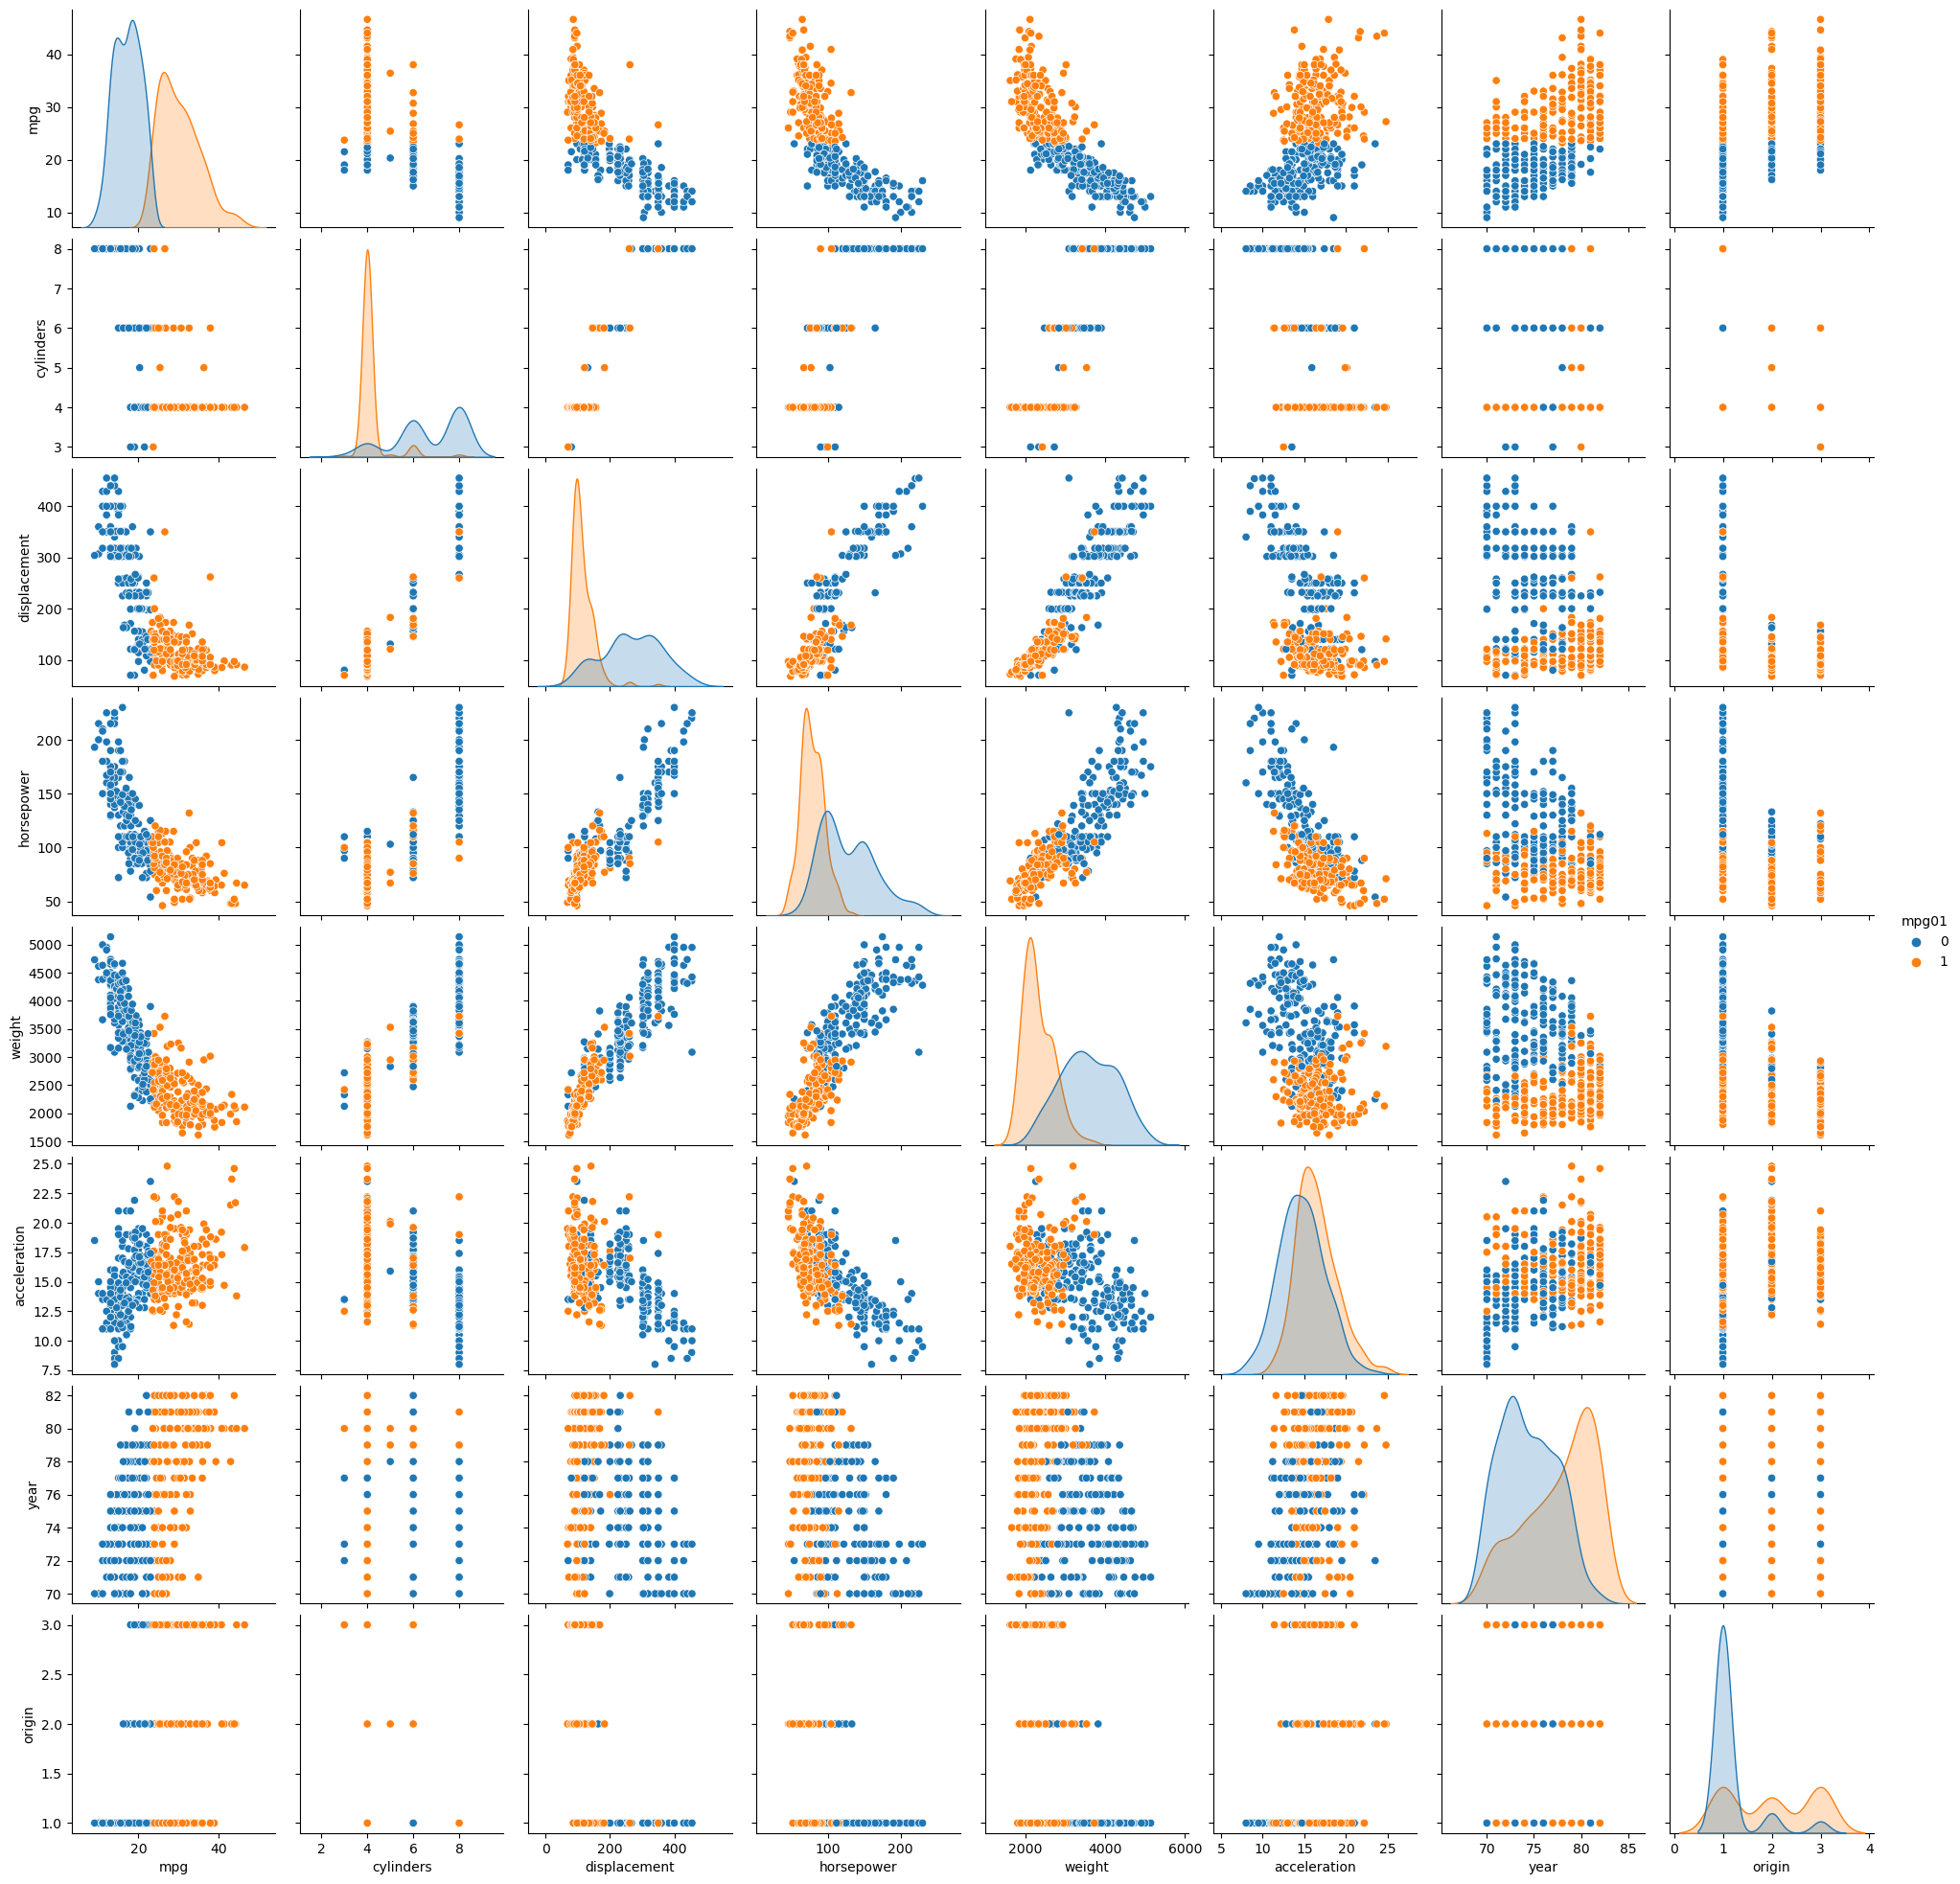

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


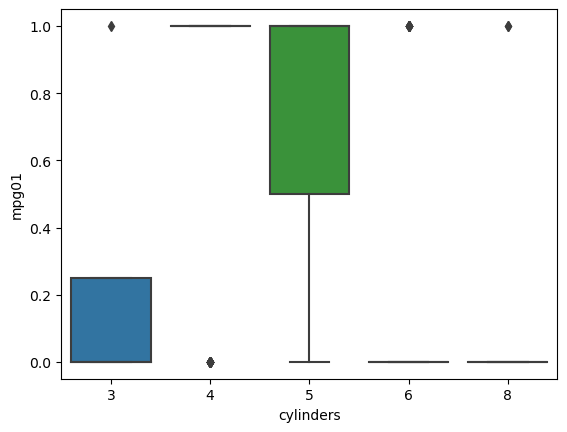

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


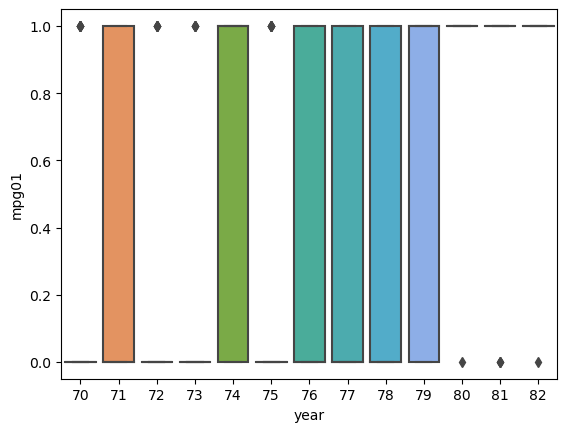

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


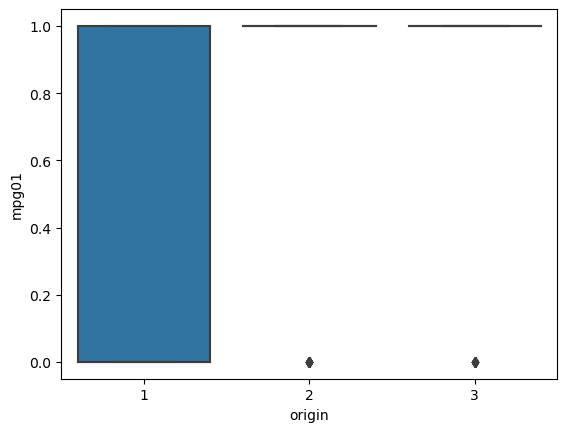

In [239]:
#PROBLEM 2 PART B

#Correlation Coefficients
print("MPG:", np.corrcoef(Y['mpg'], Y['mpg01'])[0,1])
print("Cylinders:", np.corrcoef(Y['cylinders'], Y['mpg01'])[0,1])
print("Displacement:", np.corrcoef(Y['displacement'], Y['mpg01'])[0,1])
print("Horsepower:", np.corrcoef(Y['horsepower'], Y['mpg01'])[0,1])
print("Weight:", np.corrcoef(Y['weight'], Y['mpg01'])[0,1])
print("Acceleration:", np.corrcoef(Y['acceleration'], Y['mpg01'])[0,1])
print("Year:", np.corrcoef(Y['year'], Y['mpg01'])[0,1])
print("Origin:", np.corrcoef(Y['origin'], Y['mpg01'])[0,1])

#Scatterplots
sns.pairplot(Y, hue='mpg01', diag_kind='kde')
plt.savefig('/Users/kyliehoar/Downloads/CS4342/Assignment 3/fig1.pdf')
plt.show()

#Boxplots
sns.boxplot(data=Y, x="cylinders", y="mpg01")
plt.show()

sns.boxplot(data=Y, x="year", y="mpg01")
plt.show()

sns.boxplot(data=Y, x="origin", y="mpg01")
plt.show()

In [249]:
#PROBLEM 2 PART C

x_train,x_test,y_train,y_test=train_test_split(Y[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']],Y['mpg01'],test_size=0.2)

In [252]:
#PROBLEM 2 PART D

lda(x_train[["cylinders", "displacement", "weight"]], y_train, x_test[["cylinders", "displacement", "weight"]], y_test)

[[32  3]
 [ 5 40]]
0.9


In [253]:
#PROBLEM 2 PART E

qda(x_train[["cylinders", "displacement", "weight"]], y_train, x_test[["cylinders", "displacement", "weight"]], y_test)

[[33  3]
 [ 4 40]]
0.9125


In [254]:
#PROBLEM 2 PART F

logreg(x_train[["cylinders", "displacement", "weight"]], y_train, x_test[["cylinders", "displacement", "weight"]], y_test)

[[30  4]
 [ 7 39]]
0.8625


In [255]:
#PROBLEM 2 PART G

knn(x_train[["cylinders", "displacement", "weight"]], y_train, x_test[["cylinders", "displacement", "weight"]], y_test, 1)

knn(x_train[["cylinders", "displacement", "weight"]], y_train, x_test[["cylinders", "displacement", "weight"]], y_test, 10)

knn(x_train[["cylinders", "displacement", "weight"]], y_train, x_test[["cylinders", "displacement", "weight"]], y_test, 100)

[[33  9]
 [ 4 34]]
0.8375
[[33  5]
 [ 4 38]]
0.8875
[[33  6]
 [ 4 37]]
0.875
